### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [580]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [583]:
data = pd.read_csv('C:/Users/haldh/Downloads/assignment5_1_starter/data/coupons.csv')

In [585]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [588]:
missing_values = data.isnull().sum()


#len(data): 12684
# car column is almost always missing.. 12576, column must be ignored entirely, but not dropped.. type of car does not matter
# since the number of missing fields for others is less than 2%, they will be dropped.
missing_values

#print(data['car'].value_counts())


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [591]:
df = data.drop(['car'], axis=1)

df

missing_values = df.isnull().sum()

missing_values

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [594]:
#df.isnull().sum()
df_clean = df.dropna()

#print(df_clean.isnull().sum())

print(df_clean['toCoupon_GEQ5min'].value_counts(normalize=True) * 100)
print(df_clean['toCoupon_GEQ15min'].value_counts(normalize=True) * 100)
print(df_clean['toCoupon_GEQ25min'].value_counts(normalize=True) * 100)

# In summary acceptance: 
# 100%  of 5 mins
# 56% of 15 mins
# 11% of 25 mins

toCoupon_GEQ5min
1    100.0
Name: proportion, dtype: float64
toCoupon_GEQ15min
1    56.122196
0    43.877804
Name: proportion, dtype: float64
toCoupon_GEQ25min
0    88.061926
1    11.938074
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

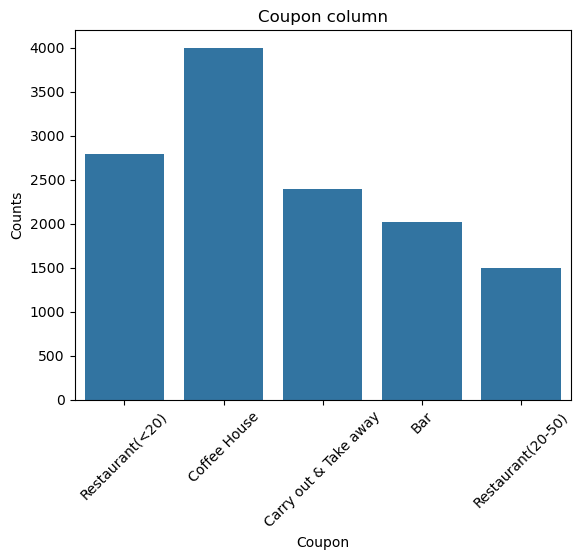

<Figure size 640x480 with 0 Axes>

In [597]:
coupons = df_clean['coupon'].value_counts()

#coupons.plot(kind='bar')

sns.countplot(x='coupon', data=data)

plt.title('Coupon column')
plt.xlabel('Coupon')
plt.ylabel('Counts')
plt.xticks(rotation=45)

# Show the plot
plt.show()

plt.savefig('C:/Working/Coupon Analysis/images/coupon_bar.png')

6. Use a histogram to visualize the temperature column.

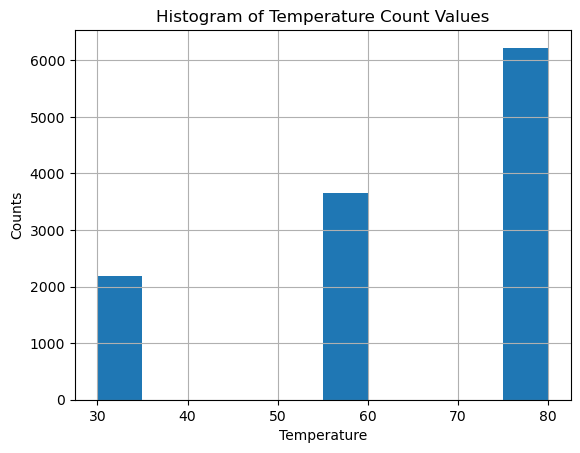

<Figure size 640x480 with 0 Axes>

In [600]:
df_clean['temperature'].hist()

plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.title('Histogram of Temperature Count Values')
plt.show()

plt.savefig('C:/Working/Coupon Analysis/images/temp_hist.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [607]:
df_clean_bar = df_clean[df_clean['coupon'] == 'Bar']

df_clean_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [610]:
print(df_clean_bar['toCoupon_GEQ5min'].value_counts(normalize=True) * 100)
print(df_clean_bar['toCoupon_GEQ15min'].value_counts(normalize=True) * 100)
print(df_clean_bar['toCoupon_GEQ25min'].value_counts(normalize=True) * 100)

toCoupon_GEQ5min
1    100.0
Name: proportion, dtype: float64
toCoupon_GEQ15min
1    66.231051
0    33.768949
Name: proportion, dtype: float64
toCoupon_GEQ25min
0    74.647151
1    25.352849
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


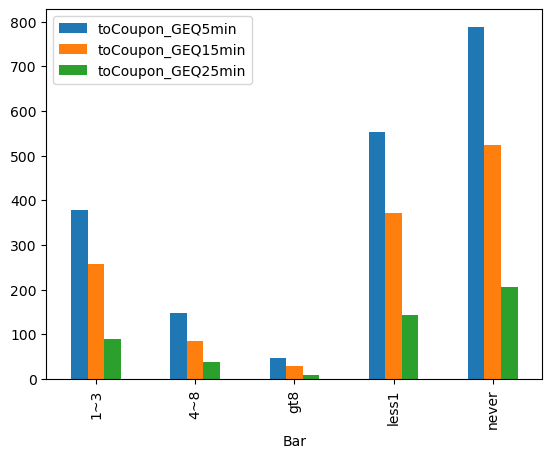

In [613]:
# need a plot showing number of bar visits vs acceptance rate

# x = bar
# y = value_counts for toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min

#coupons = df_clean_bar['coupon'].value_counts()

#coupons.plot(kind='bar')

#bar_acceptance = df_clean_bar.groupby('Bar')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].count()#.sum()#.count_values()

#bar_acceptance

#print(df_clean_bar['Bar'].value_counts())

bar_acceptance = df_clean_bar.groupby('Bar').sum()[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']]

#Bar
#never    788
#less1    553
#1~3      379
#4~8      147
#gt8       46

bar_acceptance.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/coupon_bar.png')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


age    
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64


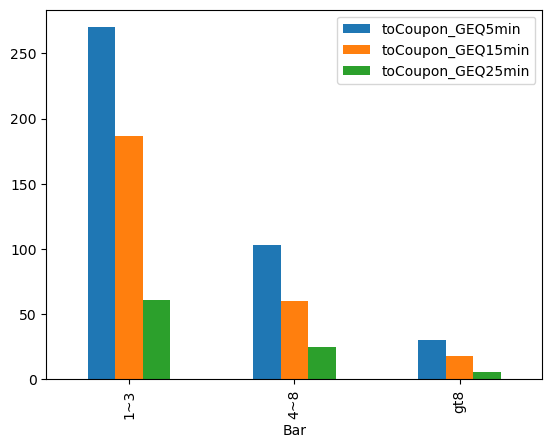

In [620]:
#
#df_clean_bar.query("int(age) > 25")

#print(df_clean_bar['age'])

#df_clean_bar['age'].replace('50plus', '50')
#df_clean_bar['age'].replace('below21', '20')

#df_clean_bar['age'] = df_clean_bar['age'].str.replace('50plus', '50')
#df_clean_bar['age'] = df_clean_bar['age'].str.replace('below21', '20')

bar_exclusion = ['never', 'less1']
age_under_25 = ['20','21','below21']


print (df_clean_bar[['age']].value_counts())

bar_acceptance = df_clean_bar.query('(age not in @age_under_25) and (Bar not in @bar_exclusion)').groupby('Bar')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()

#bar_acceptance



#bar_acceptance = df_clean_bar.query('age > 25')#.groupby('Bar').sum()[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']]
bar_acceptance.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/coupon_bar_over_25.png')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


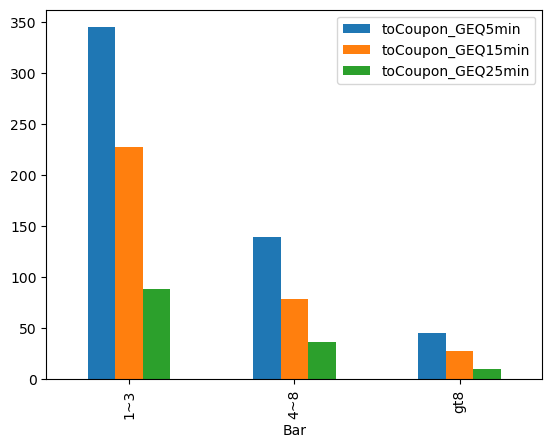

In [622]:
bar_exclusion = ['never', 'less1']
work_exclusion = ['Farming Fishing & Forestry']

bar_acceptance = df_clean_bar.query('(passanger != "Kid(s)") and (Bar not in @bar_exclusion) and (occupation not in @work_exclusion)').groupby('Bar').sum()[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']]

bar_acceptance.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/coupon_occupation_no_kids.png')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



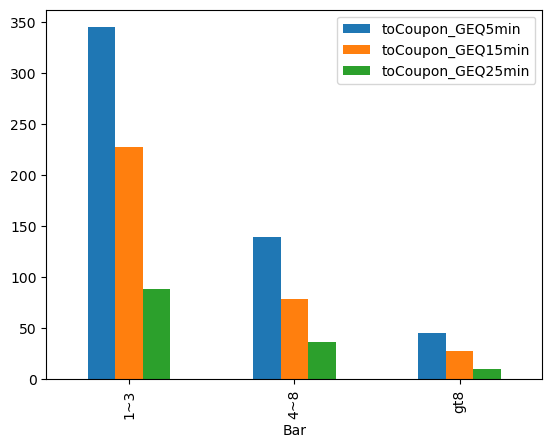

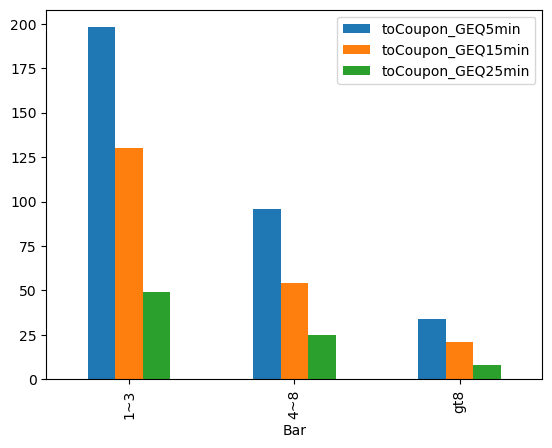

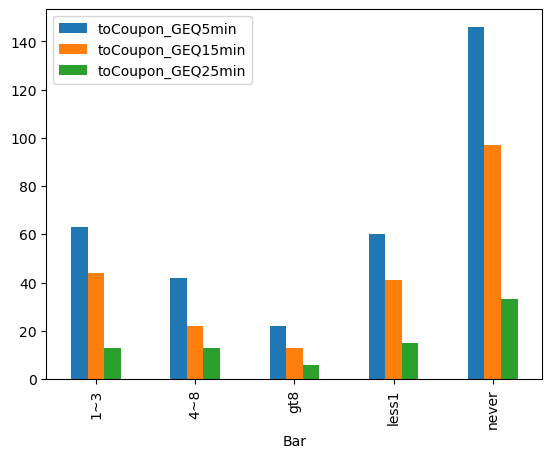

In [625]:
bar_exclusion = ['never', 'less1']
work_exclusion = ['Farming Fishing & Forestry']
more_than_4_times_a_month = ['4~8','gt8']
less_than_50k = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
age_under_30 = ['20','21','below21','26']

#print(df_clean_bar[['income']].value_counts())

#bar_acceptance = df_clean_bar.query('((Bar not in @bar_exclusion) and (passanger != "Kid(s)") and (maritalStatus != "Widowed")) or ((Bar not in @bar_exclusion) and (age < 30)) or ((RestaurantLessThan20 in @more_than_4_times_a_month)") and (income < "Widowed"))').groupby('Bar').sum()[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']]

bar_acceptance_condition_1 = df_clean_bar.query('((Bar not in @bar_exclusion) and (passanger != "Kid(s)") and (maritalStatus != "Widowed"))').groupby('Bar').sum()[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']]
bar_acceptance_condition_2 = df_clean_bar.query('((Bar not in @bar_exclusion) and (age in @age_under_30))').groupby('Bar').sum()[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']]
bar_acceptance_condition_3 = df_clean_bar.query('((RestaurantLessThan20 in @more_than_4_times_a_month) and (income in @less_than_50k))').groupby('Bar').sum()[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']]


bar_acceptance_condition_1.plot(kind='bar')
plt.savefig('C:/Working/Coupon Analysis/images/coupon_bar_acceptance_1.png')
bar_acceptance_condition_2.plot(kind='bar')
plt.savefig('C:/Working/Coupon Analysis/images/coupon_bar_acceptance_2.png')
bar_acceptance_condition_3.plot(kind='bar')
plt.savefig('C:/Working/Coupon Analysis/images/coupon_bar_acceptance_3.png')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

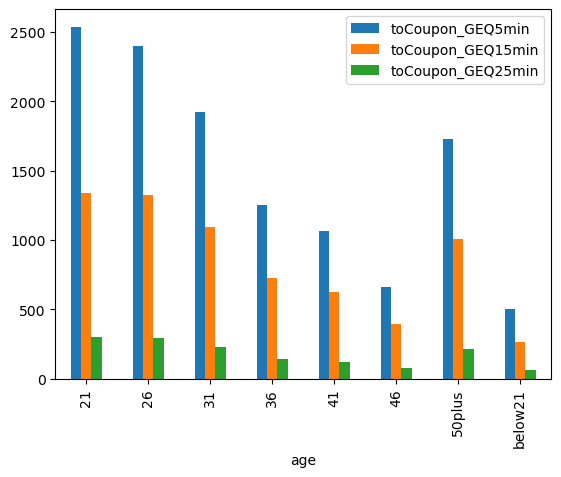

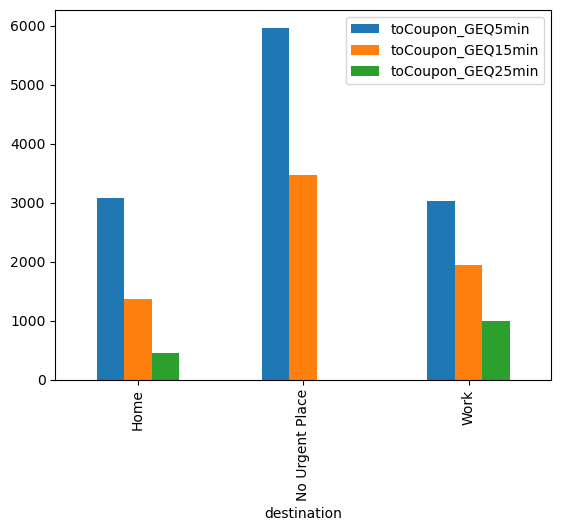

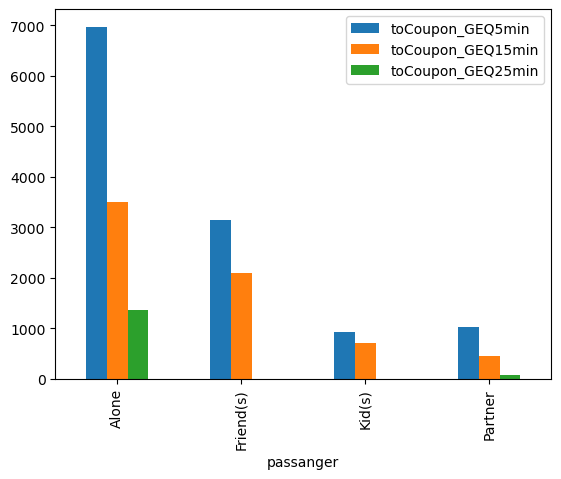

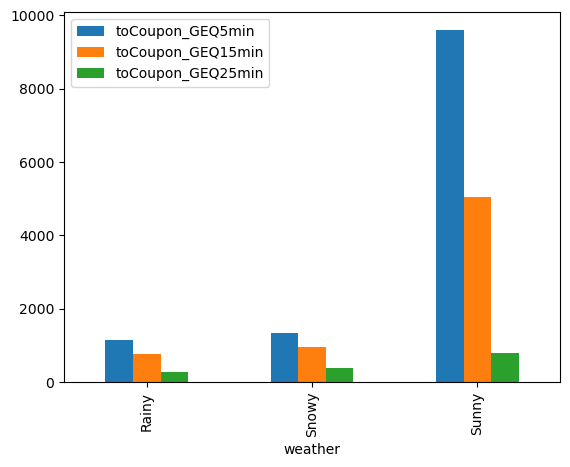

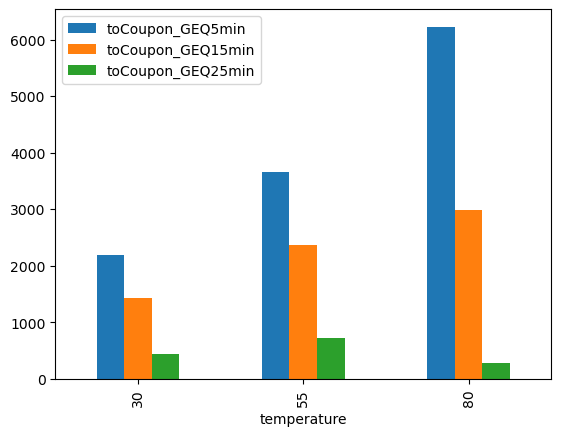

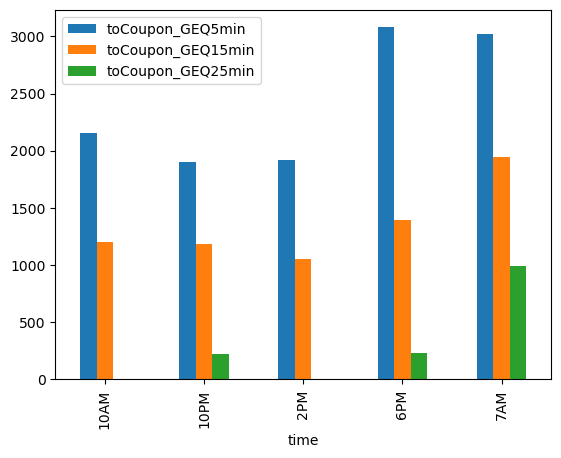

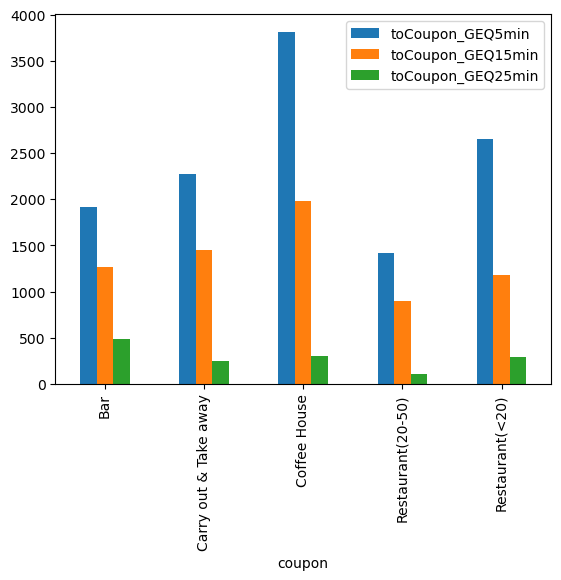

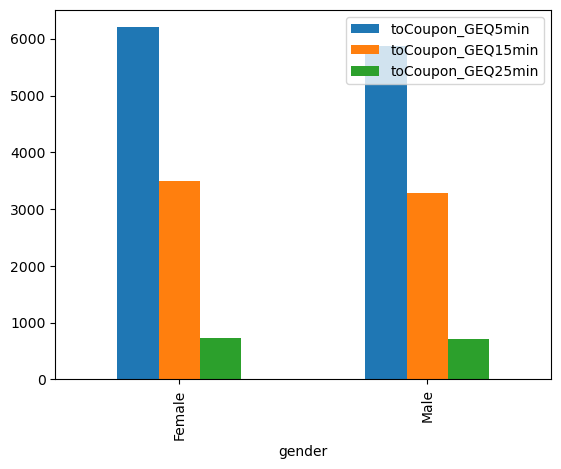

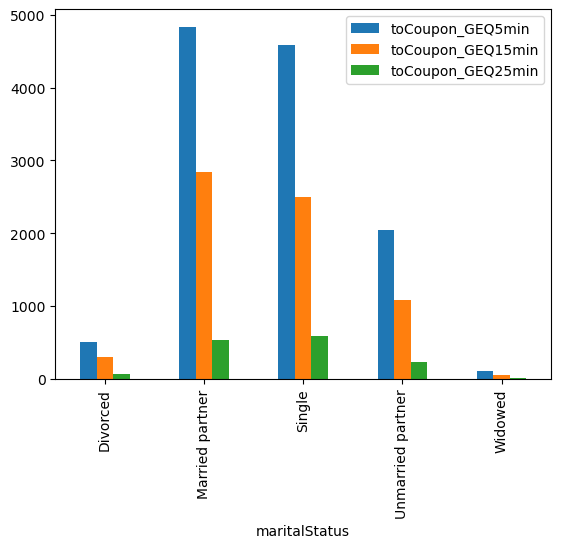

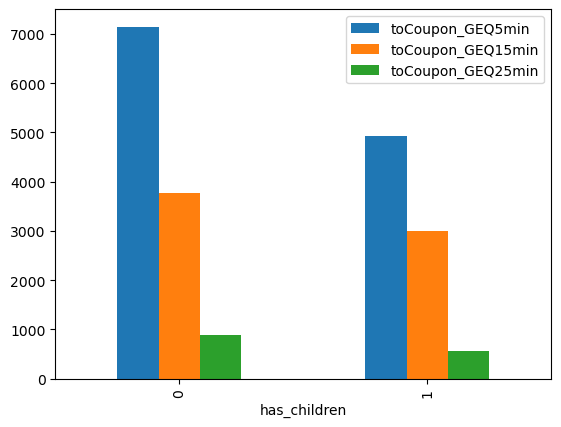

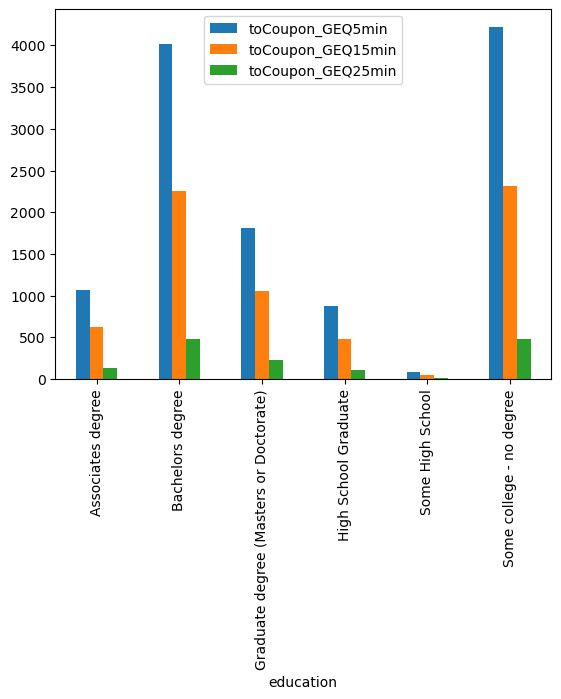

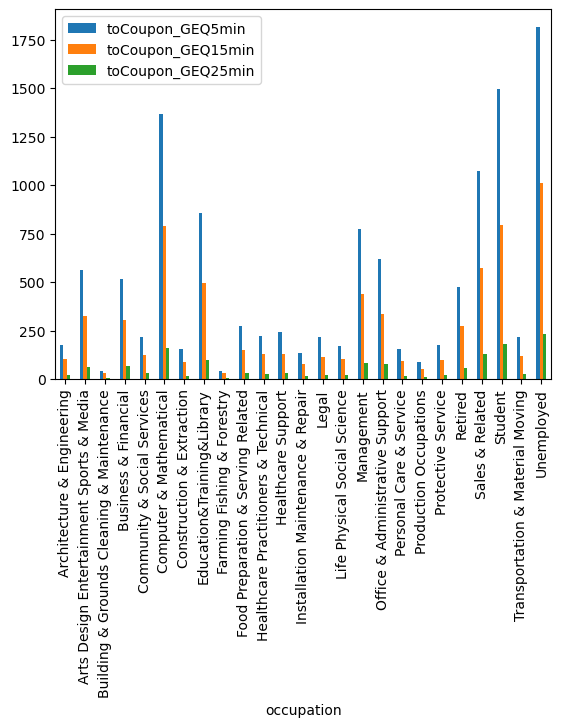

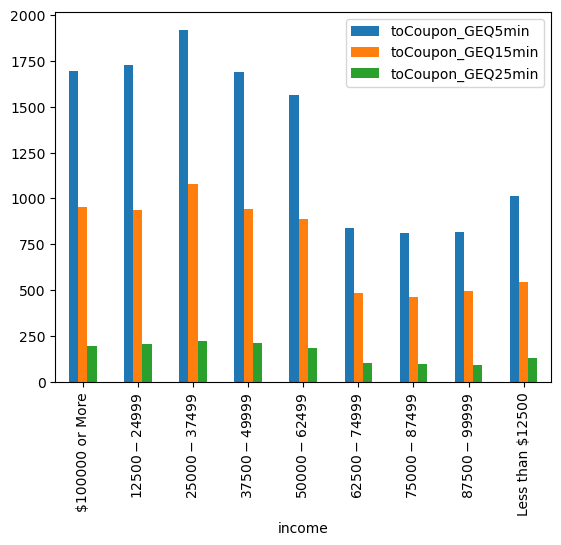

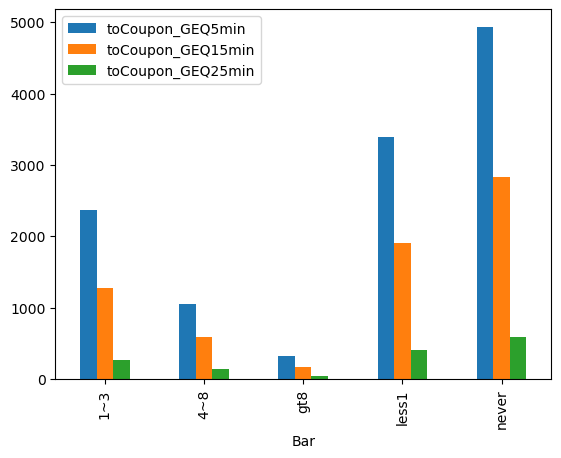

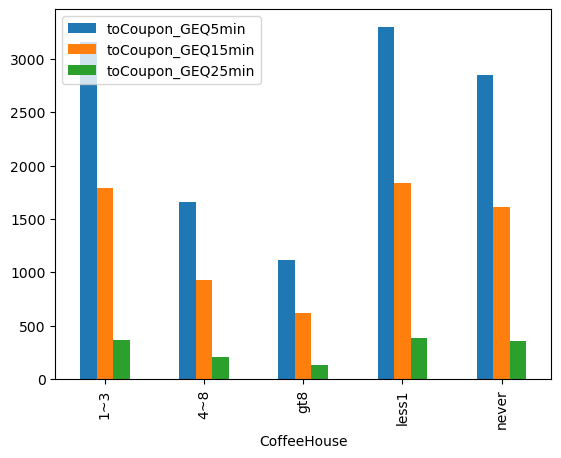

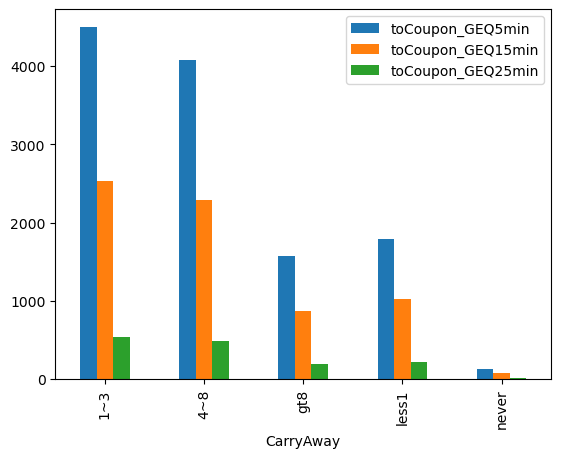

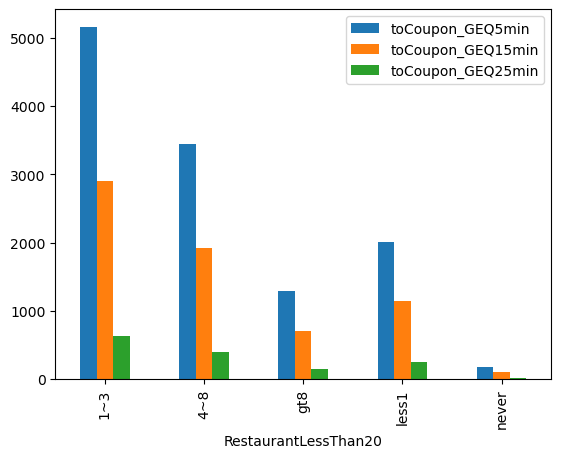

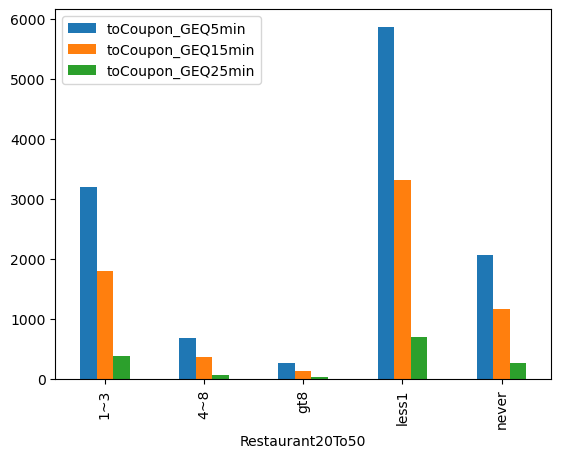

In [629]:
df_clean_age = df_clean.groupby('age')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_age.plot(kind='bar')

#destination	passanger	weather	temperature	time	coupon	expiration	gender	age	maritalStatus	has_children	education	occupation	income	car	Bar	CoffeeHouse	CarryAway	RestaurantLessThan20	Restaurant20To50

plt.savefig('C:/Working/Coupon Analysis/images/age.png')

df_clean_destination = df_clean.groupby('destination')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_destination.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/destination.png')

df_clean_passanger = df_clean.groupby('passanger')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_passanger.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/passenger.png')

df_clean_weather = df_clean.groupby('weather')[[ 'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_weather.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/weather.png')

df_clean_temperature = df_clean.groupby('temperature')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_temperature.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/temperature.png')

df_clean_time = df_clean.groupby('time')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_time.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/time.png')

df_clean_coupon = df_clean.groupby('coupon')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_coupon.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/coupon.png')

df_clean_gender = df_clean.groupby('gender')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_gender.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/gender.png')

df_clean_maritalStatus = df_clean.groupby('maritalStatus')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_maritalStatus.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/maritalStatus.png')

df_clean_has_children = df_clean.groupby('has_children')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_has_children.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/has_children.png')

df_clean_education = df_clean.groupby('education')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_education.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/education.png')

df_clean_occupation = df_clean.groupby('occupation')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_occupation.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/occupation.png')

df_clean_income = df_clean.groupby('income')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_income.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/income.png')

df_clean_Bar = df_clean.groupby('Bar')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_Bar.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/Bar.png')

df_clean_CoffeeHouse = df_clean.groupby('CoffeeHouse')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_CoffeeHouse.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/CoffeeHouse.png')

df_clean_CarryAway = df_clean.groupby('CarryAway')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_CarryAway.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/CarryAway.png')

df_clean_RestaurantLessThan20 = df_clean.groupby('RestaurantLessThan20')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_RestaurantLessThan20.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/RestaurantLessThan20.png')

df_clean_Restaurant20To50 = df_clean.groupby('Restaurant20To50')[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum()
df_clean_Restaurant20To50.plot(kind='bar')

plt.savefig('C:/Working/Coupon Analysis/images/Restaurant20To50.png')

#plt.scatter(df['age'], df['toCoupon_GEQ5min'].sum(), label='age vs toCoupon_GEQ5min', marker='o', s=50, alpha=0.7)
#plt.scatter(df['age'], df['toCoupon_GEQ15min'].sum(), label='age vs toCoupon_GEQ15min', marker='o', s=50, alpha=0.7)
#plt.scatter(df['age'], df['toCoupon_GEQ15min'].sum(), label='age vs toCoupon_GEQ15min', marker='o', s=50, alpha=0.7)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

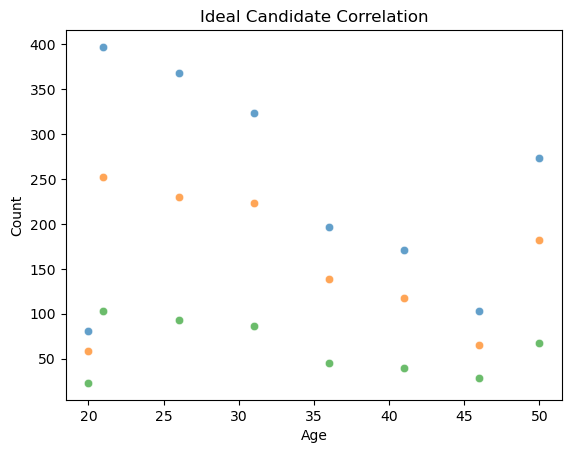

<Figure size 640x480 with 0 Axes>

In [632]:
#sns.scatterplot(x='age', y=['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'], data=df_clean, hue='smoker', style='time')

age_under_30 = ['20','21','below21','26']


#df_clean_bar['age'] = df_clean_bar['age'].replace({'below21': 20, '50plus': 50})

df_clean_bar.loc[df_clean_bar['age'] == '50plus', 'age'] = 50
df_clean_bar.loc[df_clean_bar['age'] == 'below21', 'age'] = 20

#print (df_clean_bar[['age']].value_counts())

ideal_candidate = df_clean_bar.query('(toCoupon_GEQ5min == 1) or (toCoupon_GEQ15min == 1) or (toCoupon_GEQ25min == 1) ').groupby('age').sum()

ideal_candidate

sns.scatterplot(x='age', y='toCoupon_GEQ5min', data=ideal_candidate, alpha=0.7)
sns.scatterplot(x='age', y='toCoupon_GEQ15min', data=ideal_candidate, alpha=0.7)
sns.scatterplot(x='age', y='toCoupon_GEQ25min', data=ideal_candidate, alpha=0.7)

# Add title and labels
plt.title('Ideal Candidate Correlation')

plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
#plt.show()

#sns.countplot(data=df_clean_bar, x='age')
plt.show()

plt.savefig('C:/Working/Coupon Analysis/images/IdealCandidate.png')
